<a href="https://colab.research.google.com/github/mialdrid/Python/blob/master/MDAldridge-2.22.2020_IndividualAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Aldridge
Individual Assignment 2




Part 1

In [1]:
# Import package
import nltk
nltk.download('punkt') # tokenizer
nltk.download('wordnet') # lemmatizer
nltk.download('stopwords') # used to handle words like a, an, the
nltk.download('averaged_perceptron_tagger') # Part of Speech
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Store GitHub link to Excel sheet as a variable
GitHubUrl= 'https://raw.githubusercontent.com/mialdrid/Python/master/IA2.csv'
# Read csv file into dataframe 
df = pd.read_csv(GitHubUrl,header=None)
df.columns = ['index', 'comment']
#head df to view results
df.head()

,index,comment
0,1,This is the place to go after this branch to t...
1,2,The direct delivery from Star Theater in Chian...
2,3,It is very delicious food. Good taste Unspoilt...
3,4,This house is the second time. I used to be a ...
4,5,Featured is majestic. Located on the road 107 ...


In [14]:
#Tokenize each comment/row
token_list = []
for row in df.comment:
  comments = nltk.word_tokenize(row)
  token_list.append(comments)

print(token_list)

[['This', 'is', 'the', 'place', 'to', 'go', 'after', 'this', 'branch', 'to', 'the', 'afternoon', ',', 'not', 'much', 'people', '.', 'Now', 'the', 'popular', 'menu', 'is', 'ice', 'crystal', '.', 'Hes', 'not', 'long', 'Feel', 'very', 'sorry', 'T', '^', 'T', 'This', 'is', 'a', 'full', 'set', 'of', 'Chocolate', 'Mud', 'Brownie', '(', '155.-', '฿', ')', 'Chocolate', 'Brownie', 'Sprinkle', 'with', 'vanilla', 'ice', 'cream', 'and', 'whipped', 'cream', '.', 'This', 'is', 'a', 'very', 'hot', 'menu', '.', '5/5', 'Go', 'to', 'Ferrero', 'Honey', 'Toast', '(', '245.-', '฿', ')', 'Honey', 'Toro', 'topped', 'with', 'nuts', 'Topping', 'up', 'is', 'Ferrero', '.', 'Fan', 'club', 'We', 'are', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', '😌', 'This', 'is', 'a', 'good', 'service', '.', 'It', '&', '#', '39', ';', 's', 'a', 'little', 'car', 'park', '.', 'If', 'the', 'parking', 'lot', 'of', 'the', 'building', 'will', 'be', 'stamped', 'the', 'first', '2', 'hrs', '20', 'b

In [18]:
#Lemmatize each word in comments

lem_review = []
lemmatizer = nltk.stem.WordNetLemmatizer()
for token in token_list:
  lemmatized_review = [lemmatizer.lemmatize(x) for x in token if x.isalpha()]
  lem_review.append(lemmatized_review)
print(lem_review)

[['This', 'is', 'the', 'place', 'to', 'go', 'after', 'this', 'branch', 'to', 'the', 'afternoon', 'not', 'much', 'people', 'Now', 'the', 'popular', 'menu', 'is', 'ice', 'crystal', 'Hes', 'not', 'long', 'Feel', 'very', 'sorry', 'T', 'T', 'This', 'is', 'a', 'full', 'set', 'of', 'Chocolate', 'Mud', 'Brownie', 'Chocolate', 'Brownie', 'Sprinkle', 'with', 'vanilla', 'ice', 'cream', 'and', 'whipped', 'cream', 'This', 'is', 'a', 'very', 'hot', 'menu', 'Go', 'to', 'Ferrero', 'Honey', 'Toast', 'Honey', 'Toro', 'topped', 'with', 'nut', 'Topping', 'up', 'is', 'Ferrero', 'Fan', 'club', 'We', 'are', 'This', 'is', 'a', 'good', 'service', 'It', 's', 'a', 'little', 'car', 'park', 'If', 'the', 'parking', 'lot', 'of', 'the', 'building', 'will', 'be', 'stamped', 'the', 'first', 'hr', 'baht', 'sit', 'a', 'long', 'time', 'But', 'if', 'you', 'park', 'other', 'building', 'it', 'will', 'be', 'But', 'it', 's', 'just', 'this', 'parking', 'lot', 'is', 'already', 'low'], ['The', 'direct', 'delivery', 'from', 'Star'

In [22]:
#Remove punctuation and stop words
Stopwords_removed_list = []
for stop in lem_review:
  stopwords_removed = [x for x in stop if not x in stopwords.words('english') if x.isalpha()]
  Stopwords_removed_list.append(stopwords_removed)
print (Stopwords_removed_list)

[['This', 'place', 'go', 'branch', 'afternoon', 'much', 'people', 'Now', 'popular', 'menu', 'ice', 'crystal', 'Hes', 'long', 'Feel', 'sorry', 'T', 'T', 'This', 'full', 'set', 'Chocolate', 'Mud', 'Brownie', 'Chocolate', 'Brownie', 'Sprinkle', 'vanilla', 'ice', 'cream', 'whipped', 'cream', 'This', 'hot', 'menu', 'Go', 'Ferrero', 'Honey', 'Toast', 'Honey', 'Toro', 'topped', 'nut', 'Topping', 'Ferrero', 'Fan', 'club', 'We', 'This', 'good', 'service', 'It', 'little', 'car', 'park', 'If', 'parking', 'lot', 'building', 'stamped', 'first', 'hr', 'baht', 'sit', 'long', 'time', 'But', 'park', 'building', 'But', 'parking', 'lot', 'already', 'low'], ['The', 'direct', 'delivery', 'Star', 'Theater', 'Chiang', 'Mai', 'I', 'guarantee', 'really', 'cool', 'There', 'variety', 'flavor', 'choose', 'baht', 'per', 'piece', 'taste', 'choose', 'buy', 'buy'], ['It', 'delicious', 'food', 'Good', 'taste', 'Unspoilt', 'For', 'people', 'like', 'eat', 'spicy', 'much', 'cooked', 'The', 'shop', 'ha', 'prepared', 'Chil

In [6]:
#Create TF-IDF Vectors
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
vectorizer.fit(stopwords_removed)

vector = vectorizer.transform(stopwords_removed)


print(vector.toarray())
print('\n')
print(vectorizer.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


{'liu': 13, 'zhenyun': 29, 'the': 22, 'small': 21, 'forest': 3, 'unit': 24, 'chicken': 1, 'historical': 5, 'hometown': 7, 'series': 20, 'nothing': 15, 'language': 10, 'writer': 26, 'narrative': 14, 'real': 19, 'in': 8, 'quot': 18, 'thousand': 23, 'people': 16, 'yellow': 28, 'like': 12, 'history': 6, 'ha': 4, 'it': 9, 'everyone': 2, 'life': 11, 'change': 0, 'power': 17, 'year': 27, 'wa': 25}


In [7]:
#POS
# Tag each word from output one with Part of Speech

comments

POS = []
for comment in comments:
    tokens = nltk.word_tokenize(comment) # tokenize the words
    POS_tokens = nltk.pos_tag(tokens) # pos tag the tokens
    POS_token_temp = []
    for i in POS_tokens:
        POS_token_temp.append(i[0] + i[1]) # create tuples for the tokens/pos tags
    POS.append(" ".join(POS_token_temp))

vectorizer2 = TfidfVectorizer()
vectorizer2.fit(POS)
print(vectorizer2.vocabulary_)

print('\n')

POS_2 = vectorizer2.transform(POS)
print(POS_2.toarray())

{'somedt': 280, 'ofin': 208, 'liunn': 167, 'zhenyunnn': 356, 'nn': 199, 'snn': 277, 'worksnns': 344, 'havevb': 118, 'beenvbn': 25, 'readnn': 239, 'intermittentlyrb': 145, 'thedt': 303, 'smalljj': 275, 'forestnn': 95, 'inin': 143, 'unitnn': 321, 'andcc': 14, 'chickennn': 45, 'landnn': 154, 'grewvbd': 111, 'uprb': 324, 'underin': 319, 'reformnn': 245, 'openingnn': 215, 'marketnn': 177, 'economynn': 69, 'manyjj': 176, 'historicaljj': 129, 'figuresnns': 86, 'hometownnnp': 132, 'seriesnn': 268, 'encirclenn': 72, 'realitynn': 243, 'nothingnn': 201, 'morerbr': 189, 'thanin': 301, 'blackjj': 30, 'humornn': 136, 'languagenn': 155, 'revealsnns': 254, 'hisprp': 127, 'embarrassmentnn': 70, 'asin': 17, 'adt': 6, 'writernn': 347, 'charactersnns': 44, 'arevbp': 16, 'notrb': 202, 'importantjj': 141, 'whatwp': 338, 'isvbz': 149, 'toto': 313, 'dispelnn': 64, 'grandjj': 109, 'narrativejj': 193, 'contextnn': 52, 'defeatnn': 58, 'tallnn': 295, 'completejj': 51, 'returnnn': 253, 'realjj': 244, 'namenn': 192

Part 2

In [0]:
# Import
from google.colab import files
import os
import numpy as np
from PIL import Image
from pylab import *

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

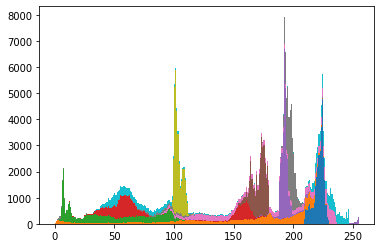

In [11]:
#loop through and add each image to a list
# for loop to grab all of the files from the current working directory

#create a list to store png images in
PNGImages = []
for img_path in os.listdir():
  # PNG files
  if img_path.endswith(".PNG"):
      #reading images
      img = Image.open(img_path)
      #convert to grayscale
      img = img.convert('L')
      #resize 100 x 100 pixels
      img = np.resize(img,(100,100,3))
      #flatten to a 1D array
      img = img.flatten()
      #append each image to the list
      PNGImages.append(img)


# plotting the image arrays in a histogram with 256 bins
plt.hist(PNGImages,bins=255,stacked=True)

([array([11., 12.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0., 12.,  0.,
          0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,
          0.,  0., 12.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0., 11.,
          0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
          0.,  0.,  0.,  0.,  0.,  0.,

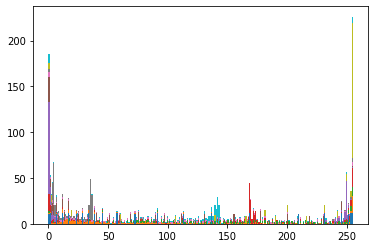

In [12]:
#Create a new list
PNGImages_2 =[]
# for loop to grab all of the files from the current working directory
for img_path in os.listdir():
  # grabbing all PNG files
  if img_path.endswith(".PNG"):
      #reading in the images
      img = Image.open(img_path)
      #converting them to grayscale
      img = img.convert('L')
      #resizing them to 100 x 100 pixels
      img = np.resize(img,(100,100,3))
      #flattening the 2D array to a 1D array
      img = img.flatten()
      img, bins = histogram(img, 256, density=True)
      img = img.cumsum()
      img = 255 * img / img[-1] # Normalization to ensure that we are in [0,255]
      #appending the image arrays to the list I initiated earlier
      PNGImages_2.append(img)

# plotting the image arrays in a histogram with 256 bins
plt.hist(PNGImages_2, bins=255, stacked=True)